<a href="https://colab.research.google.com/github/Chebem/Audio_Processing/blob/main/P08_Real_World_Project___audio_data_Processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Voice Data Preprocessing Steps

## Domain-Specific Speech Recognition


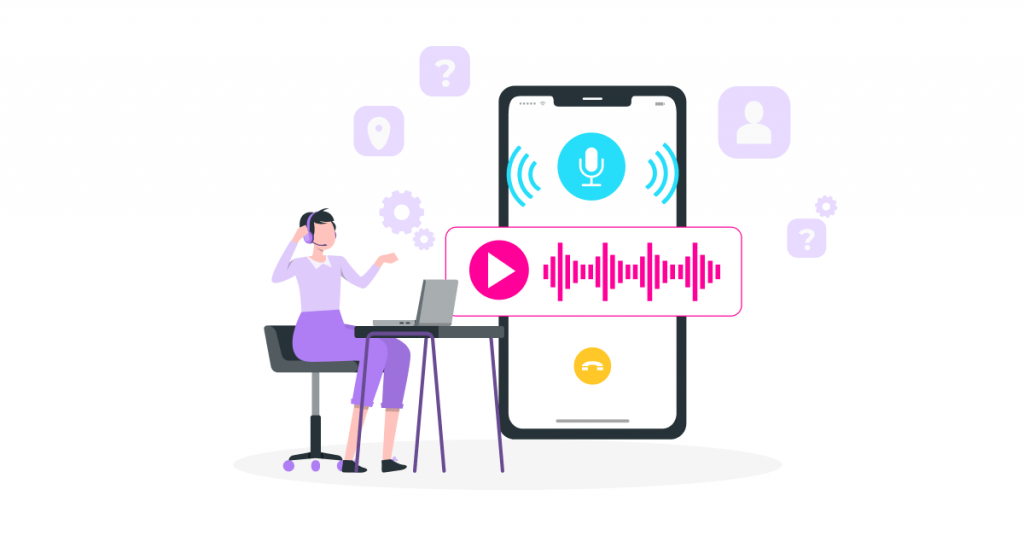

### Understanding the Concept and Applications of Speech Recognition

* **Speech recognition** is a technology that converts **spoken human language** into text that a computer can understand.
* This technology is applied across various fields:
  * Virtual assistants (e.g., Siri, Alexa, Google Assistant)
  * Automated customer service call centers
  * In-car voice control systems
  * Automated transcription in medical and legal fields
  *Accessibility improvement (voice-based interfaces for people with disabilities)

### Analysis of the Need for Domain-Specific Speech Recognition

* General speech recognition models are suitable for handling a wide range of topics
* However, they may show limitations such as reduced accuracy in specific professional or industrial environments.
*	Reasons why domain-specific speech recognition is necessary:
	*	**Improved accuracy** through the correct recognition of **industry-specific terminology** or **technical jargon**
	* **Performance enhancement** by learning specialized terms and expressions used in a particular field
	* **Enhanced user experience** by building **customized speech recognition systems** tailored to real-world environments

## Overview of Speech Recognition Technology

* **Speech Collection and Preprocessing**  
  - Collects audio signals  
  - Applies noise reduction, volume normalization, etc.

* **Feature Extraction**  
  - Extracts key features from audio using techniques such as MFCC (Mel-Frequency Cepstral Coefficients)

* **Model Training and Inference**  
  - Uses deep learning models such as DNN, CNN, RNN, and Transformer to convert speech to text

* **Post-processing**  
  - Enhances the accuracy of the transcribed text using a language model

### Characteristics of Call Center Speech Data

* Call center speech data differs from general speech data in several ways:
  * It consists of **dialogues between customers and agents**
  * It often includes **noise due to background sounds and telephone channel characteristics**
  * There is **a wide range of emotional expressions, intonation, and variation in speaking speed**
  * It frequently contains **domain-specific language** such as **customer complaints and requests**

### Limitations and Challenges of Existing Models

* When applying general-purpose speech recognition models to the call center domain, the following limitations and issues arise:
  * **Reduced accuracy** due to the **failure to recognize specialized terms and expressions**
  * **Decreased recognition quality** caused by **background noise and poor audio quality**
  * **Inability to effectively recognize diverse intonations and speaking styles**
  * **Generalization issues** resulting from **insufficient domain-specific training data**
  

### Speech Data Preparation and Exploration

* The first step in developing a speech recognition model is data preparation and exploration:
  * **Data Collection**: Gathering and managing recorded call center conversation data
  * **Data Cleaning and Preprocessing**: Removing noise, enhancing audio quality, and trimming silent segments
  * **Labeling**: Creating accurate text labels corresponding to the speech data
  * **Data Exploration and Analysis**: Analyzing characteristics such as utterance length, frequency, and noise levels to assess data quality and identify areas for improvement

## Understanding and Analyzing the Structure of the AIHUB Speech Dataset

* Low-quality telephone network speech recognition dataset:  
  https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=data&dataSetSn=571

* (Due to storage limitations) Download sample data (linked to Google Drive)

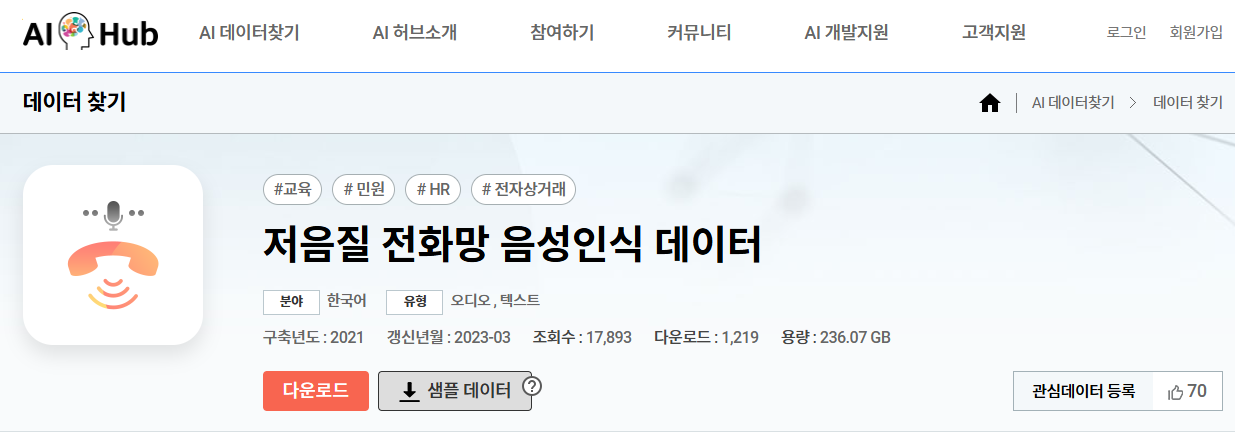

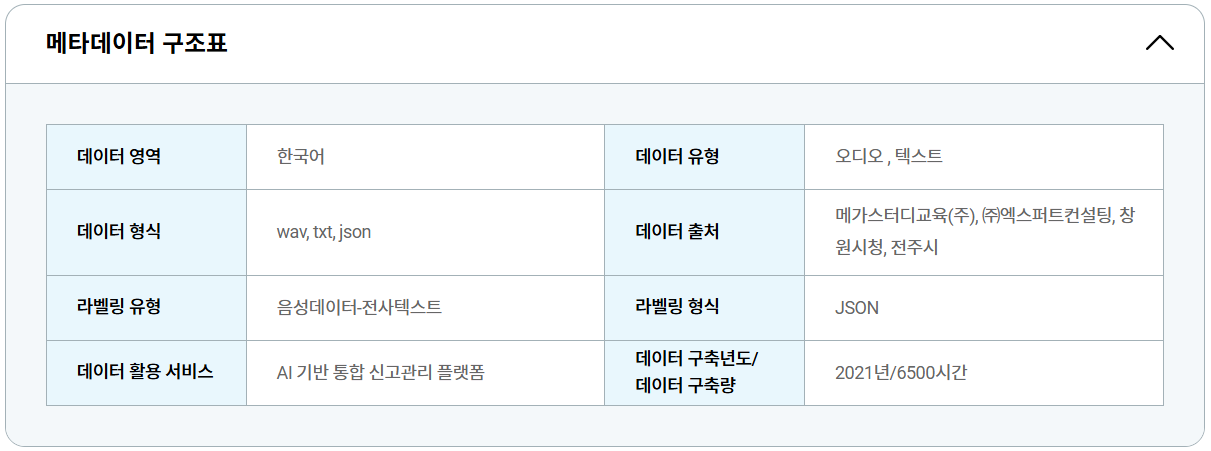

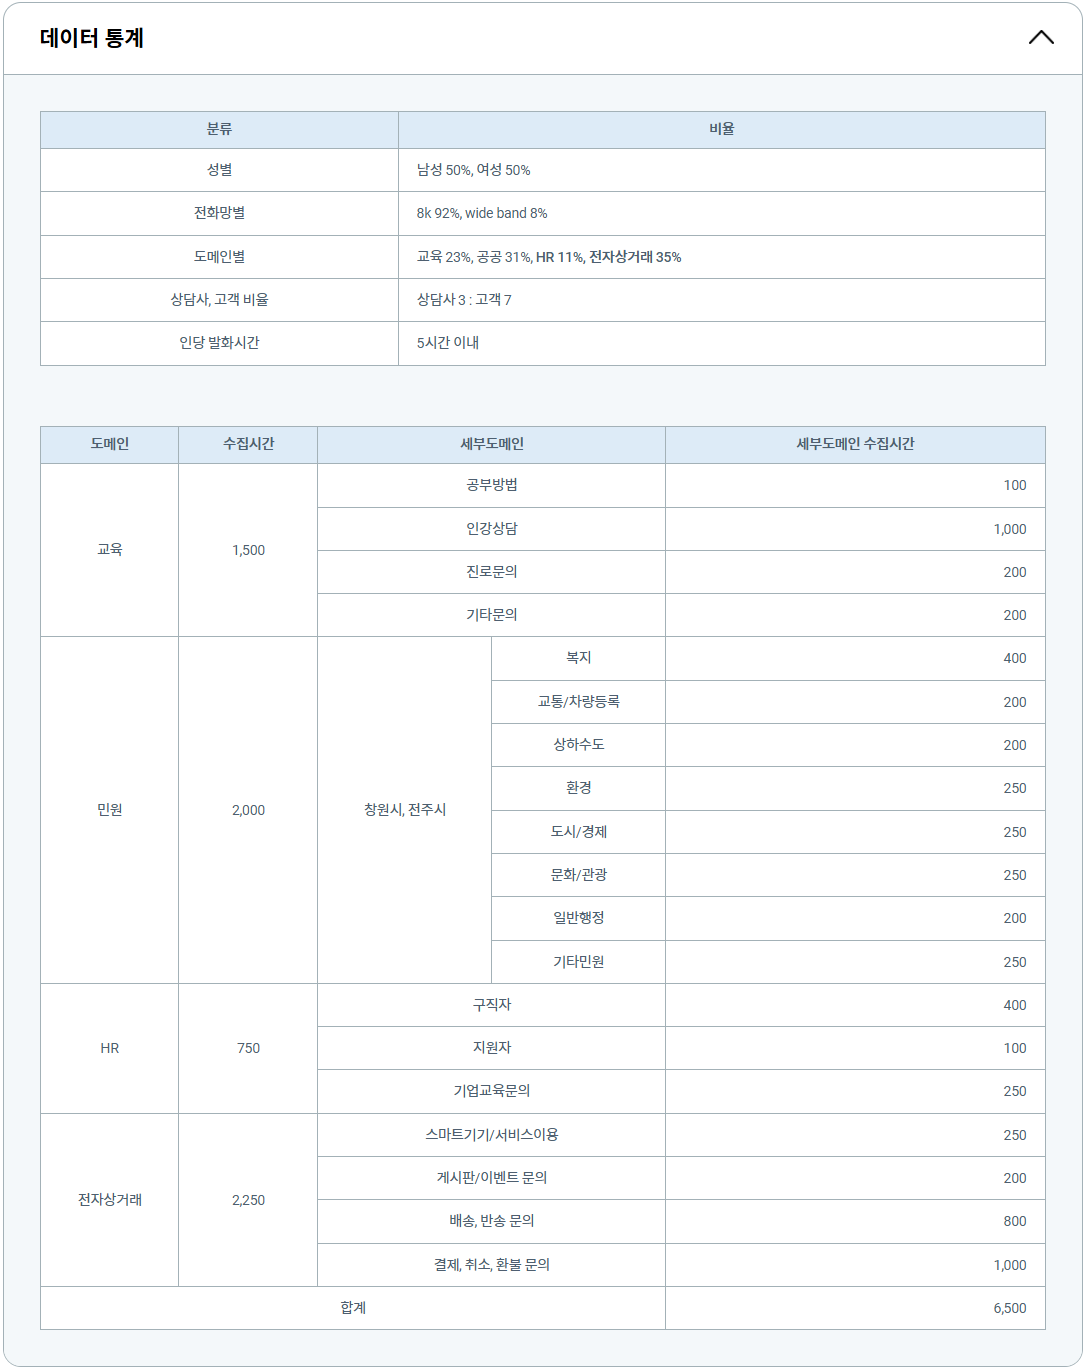

### 데이터셋 로드 (구글 드라이브 연동)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* 구글 드라이브에서 다운로드한 파일 경로 확인

In [ ]:
!ls '/content/drive/MyDrive/[Dataset]/low-quality telephone network voice data recogintion sample/'

ls: cannot access '/content/drive/MyDrive/[Dataset]/low-quality telephone network voice data recogintion sample/': No such file or directory


In [ ]:
wav_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13'
txt_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/라벨링데이터/TL_D03/D03/J13'

### 음성 파일과 텍스트 확인

In [ ]:
import librosa
from IPython.display import Audio

# Set the path to the text and audio files
text_file = txt_dir + '/S000002/0002.txt'
audio_file = wav_dir + '/S000002/0002.wav'

# Load and print the transcript
with open(text_file, 'r', encoding='utf-8') as file:
    content = file.read()
    print("Transcript:\n", content)

# Load the audio and play it
audio_data, sampling_rate = librosa.load(audio_file, sr=None)
Audio(data=audio_data, rate=sampling_rate)

Transcript:
 네 그 교육 신청을 하려고 했는데.


In [ ]:
import librosa
from IPython.display import Audio, display

# Set file paths
text_file = txt_dir + '/S000002/0003.txt'
audio_file = wav_dir + '/S000002/0003.wav'

# Read and display transcript
with open(text_file, 'r', encoding='utf-8') as file:
    content = file.read()
    print("Transcript:\n", content)

# Load and play audio
audio_data, sampling_rate = librosa.load(audio_file, sr=None)
display(Audio(data=audio_data, rate=sampling_rate))

Transcript:
 공공기관 채용 시험 평가 위원.


In [ ]:
import librosa
from IPython.display import Audio, display

# Set file paths
text_file = txt_dir + '/S000002/0004.txt'
audio_file = wav_dir + '/S000002/0004.wav'

# Read and print transcript
with open(text_file, 'r', encoding='utf-8') as file:
    content = file.read()
    print("Transcript:\n", content)

# Load and play audio
audio_data, sampling_rate = librosa.load(audio_file, sr=None)
display(Audio(data=audio_data, rate=sampling_rate))

Transcript:
 그거는 그 (()) 안 하나요?


## Data Cleaning for Model Training




### Audio Sampling Rate Conversion

* When dealing with speech data, files recorded in different environments may have varying sampling rates.
* To maintain consistency for model training and improve computational efficiency, all data should be converted to a unified sampling rate.
* Commonly used sampling rates are **16 kHz** or **8 kHz**.
* To minimize quality degradation during conversion, **high-quality resampling algorithms** should be used.

In [ ]:
import librosa
audio_path = wav_dir + '/S000002/0002.wav'
audio_data, original_sr = librosa.load(audio_path, sr=None)
Audio(data=audio_data, rate=original_sr)

In [ ]:
target_sr = 16000
audio_resampled = librosa.resample(audio_data, orig_sr=original_sr, target_sr=target_sr)
Audio(data=audio_resampled, rate=target_sr)

### Background Noise Removal & Volume Normalization

* Speech recorded in real-world environments often contains background noise or inconsistent volume levels.
* It is important to address these issues to obtain a clear and clean audio signal.

* **Background Noise Removal**
  * Use noise reduction algorithms such as **spectral gating** or **Wiener filtering**.

* **Volume Normalization**
  * Adjust speech data to a consistent volume level to ensure uniform loudness.
  * Methods include **peak normalization** and **RMS normalization**.

In [ ]:
!pip install noisereduce

In [ ]:
import noisereduce as nr
import librosa
import soundfile as sf
from IPython.display import Audio, display

# Load the audio
audio_data, sr = librosa.load(audio_path, sr=16000)

# Apply noise reduction
reduced_noise_audio = nr.reduce_noise(y=audio_data, sr=sr)

# Play the denoised audio
display(Audio(data=reduced_noise_audio, rate=sr))

In [ ]:
from IPython.display import Audio, display
import librosa

# Apply peak normalization
normalized_audio = librosa.util.normalize(reduced_noise_audio)

# Play normalized audio
display(Audio(data=normalized_audio, rate=sr))

### Speech-Text Alignment (Transcription Cleanup & Alignment)

* For training a speech recognition model, **speech data must be accurately aligned with the corresponding transcription**:
  * Ensure temporal alignment between audio and text
  * Correct inaccurate labels and maintain text consistency
  * Perform text preprocessing such as handling special characters, numbers, and punctuation

* Tools for Speech-Text Alignment:
  * **Montreal Forced Aligner (MFA)**
    * Operates via command-line interface (CLI); typically used outside of Python scripts
    * Requires language-specific pronunciation dictionaries
    * Widely used in large academic and audio projects
  * **Gentle**
    * Can run via web interface or Docker; easy to use for English speech-text alignment
  * **Aeneas**
    * A Python library suitable for integrating directly into projects via scripts
    * Supports multiple languages, though configuration is needed for non-English alignment

* Example Workflow for Alignment:
  * Review and correct the original **transcriptions**
  * Use a forced alignment tool to precisely align audio with the corresponding text segments
  * Use the aligned results as final training data for your model

### Understanding the Structure of Speech and Transcript Data

* To effectively train and manage a speech recognition model, it is essential to understand the structure of both the **audio files** and their corresponding **transcripts**.

* **Typical Components:**
  * **Audio Files**: Usually stored in `.wav` or `.flac` format with standardized sampling rates (e.g., 16 kHz)
  * **Transcript Files**: Plain text files (`.txt` or `.csv`) containing the spoken content, often line-aligned with the audio
  * **Metadata** (optional): Includes speaker ID, language, gender, recording environment, etc.

* **Common Folder Structure Example:**

In [ ]:
!cat '/content/drive/MyDrive/Low-quality Phone voice sample/라벨링데이터/TL_D03/D03/J13/S000002/S000002.json'

{
    "dataSet": {
        "version": "1.0",
        "date": "null",
        "typeInfo": {
            "category": "HR",
            "subcategory": "구직자",
            "place": "null",
            "inputType": "전화",
            "speakers": [
                {
                    "id": "1",
                    "type": "상담사1",
                    "age": "20대",
                    "gender": "여",
                    "residence": "알수없음",
                    "telephone_network": "wide_band"
                },
                {
                    "id": "2",
                    "type": "고객1",
                    "age": "40대",
                    "gender": "남",
                    "residence": "알수없음",
                    "telephone_network": "wide_band"
                }
            ]
        },
        "dialogs": [
            {
                "speaker": "1",
                "audioPath": "D03/J13/S000002/0001.wav",
                "duration": 3.956,
                "text": "네 감사합니다. (NCS)/(엔 

## Preparing Data for Model Training and Evaluation

- Typically, data is divided into two separate CSV files: `train.csv` for training and `eval.csv` for evaluation.
- The CSV file used for model training should contain at least the following two columns:

  - **`path`**
    - Specifies the path to the audio file as a string.
    - Can be either an **absolute path** (based on the local file system) or a **relative path** (based on the current notebook execution directory).

  - **`text`**
    - The **ground truth transcription** corresponding to the audio file, provided as a string.
    - This should be the full sentence or phrase the model is expected to predict, including spaces.

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Root directories for audio and text
wav_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13'
txt_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/라벨링데이터/TL_D03/D03/J13'

# Output CSV paths
train_csv = '/content/drive/MyDrive/Low-quality Phone voice sample/train.csv'
eval_csv  = '/content/drive/MyDrive/Low-quality Phone voice sample/eval.csv'

rows = []

# Traverse the audio directory recursively
for dirpath, _, filenames in os.walk(wav_dir):
    for fname in filenames:
        if not fname.lower().endswith('.wav'):
            continue

        wav_path = os.path.join(dirpath, fname)
        rel_path = os.path.relpath(wav_path, wav_dir)  # Relative path
        txt_path = os.path.join(txt_dir, os.path.splitext(rel_path)[0] + '.txt')  # Match .txt to .wav

        if not os.path.exists(txt_path):
            print(f"[Warning] Transcript not found: {txt_path}")
            continue

        with open(txt_path, 'r', encoding='utf-8') as f:
            transcript = f.read().strip()

        rows.append({'path': wav_path, 'text': transcript})

# Create DataFrame
df = pd.DataFrame(rows, columns=['path', 'text'])
n = len(df)
print(f"Total samples found: {n}")

if n == 0:
    raise RuntimeError("No valid audio-transcript pairs found.")

eval_size = max(1, int(n * 0.1))
train_size = n - eval_size

# Split into train/eval sets
train_df, eval_df = train_test_split(
    df,
    train_size=train_size,
    test_size=eval_size,
    shuffle=True,
    random_state=42
)

# Save to CSV
os.makedirs(os.path.dirname(train_csv), exist_ok=True)
train_df.to_csv(train_csv, index=False, encoding='utf-8')
eval_df.to_csv(eval_csv, index=False, encoding='utf-8')

print(f"✅ Training CSV saved: {train_csv} ({len(train_df)} samples)")
print(f"✅ Evaluation CSV saved: {eval_csv} ({len(eval_df)} samples)")

Total samples found: 2000
✅ Training CSV saved: /content/drive/MyDrive/Low-quality Phone voice sample/train.csv (1800 samples)
✅ Evaluation CSV saved: /content/drive/MyDrive/Low-quality Phone voice sample/eval.csv (200 samples)


## Preparing Data for SpeechBrain

* As an initial step for training an end-to-end speech recognizer, it is crucial to create a **data manifest file**.
* This file tells SpeechBrain where the **audio files** and their corresponding **transcriptions** are located.
* It is typically written in **CSV** or **JSON** format.
* The data manifest plays an essential role in organizing the training process systematically and reproducibly.

### Structure of a Data Manifest File (JSON Example)

SpeechBrain uses a JSON-based manifest format where each entry describes one audio-transcription pair. Below is a typical structure:


```json
{
  "1867-154075-0032": {
    "wav": "{data_root}/LibriSpeech/train-clean-5/1867/154075/1867-154075-0032.flac",
    "length": 16.09,
    "words": "AND HE BRUSHED A HAND ACROSS HIS FOREHEAD AND WAS INSTANTLY HIMSELF CALM AND COOL VERY WELL THEN IT SEEMS I'VE MADE AN ASS OF MYSELF BUT I'LL TRY TO MAKE UP FOR IT NOW WHAT ABOUT CAROLINE"
  },
  "1867-154075-0001": {
    "wav": "{data_root}/LibriSpeech/train-clean-5/1867/154075/1867-154075-0001.flac",
    "length": 14.9,
    "words": "THAT DROPPED HIM INTO THE COAL BIN DID HE GET COAL DUST ON HIS SHOES RIGHT AND HE DIDN'T HAVE SENSE ENOUGH TO WIPE IT OFF AN AMATEUR A RANK AMATEUR I TOLD YOU SAID THE MAN OF THE SNEER WITH SATISFACTION"
  },
  "1867-154075-0028": {
    "wav": "{data_root}/LibriSpeech/train-clean-5/1867/154075/1867-154075-0028.flac",
    "length": 16.41,
    "words": "MY NAME IS JOHN MARK I'M DOONE SOME CALL ME RONICKY DOONE I'M GLAD TO KNOW YOU RONICKY DOONE I IMAGINE THAT NAME FITS YOU NOW TELL ME THE STORY OF WHY YOU CAME TO THIS HOUSE OF COURSE IT WASN'T TO SEE A GIRL"
  },
}
* Each entry's **key** is a unique ID representing the audio utterance.
* `wav`: Path to the audio file.
* `length`: Duration of the audio in seconds.
* `words`: Transcription text corresponding to the audio.
* `{data_root}`: A variable that can be dynamically set via the command line or a YAML configuration file.

### Data Preparation Script

* Since each dataset has a different structure, you must write a preprocessing script tailored to your specific dataset.
* The goal is to generate a **JSON-formatted manifest file**.
* Based on this script, you can customize the preparation process for your own dataset.
* The script typically produces **three separate manifest files** for:
  - Training data (`train.json`)
  - Validation data (`valid.json`)
  - Test data (`test.json`)

In [ ]:
%%capture
# Installing SpeechBrain via pip
BRANCH = 'develop'
!python -m pip install git+https://github.com/speechbrain/speechbrain.git@$BRANCH
# Clone SpeechBrain repository
!git clone https://github.com/speechbrain/speechbrain/

In [ ]:
json_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/asr.json'

# Create parent directory if it doesn't exist
os.makedirs(os.path.dirname(json_dir), exist_ok=True)

In [ ]:
import os
import json
from speechbrain.dataio.dataio import read_audio

# Set the sample rate of your audio dataset
SAMPLERATE = 8000

# Define function
def create_manifest_recursive(audio_root, label_root, output_json_path):
    entries = {}

    for root, _, files in os.walk(audio_root):
        for filename in files:
            if not filename.endswith(".wav"):
                continue

            uttid = os.path.splitext(filename)[0]
            wav_path = os.path.join(root, filename)
            print(f"📁 Found WAV: {wav_path}")

            rel_dir = os.path.relpath(root, audio_root)
            speaker = rel_dir.split(os.sep)[0]

            # Replace TS_ prefix with TL_ to match label folder
            label_rel_dir = rel_dir.replace("TS_", "TL_")
            label_path = os.path.join(label_root, label_rel_dir, f"{uttid}.txt")

            if not os.path.exists(label_path):
                print(f"⚠️ Missing label → Skipped")
                continue

            signal = read_audio(wav_path)
            duration = signal.shape[0] / SAMPLERATE

            with open(label_path, "r", encoding="utf-8") as f:
                text = f.read().strip()

            rel_wav_path = os.path.join("{data_root}", rel_dir, filename)
            key = f"{speaker}_{uttid}"

            entries[key] = {
                "wav": rel_wav_path,
                "length": duration,
                "words": text
            }

    os.makedirs(os.path.dirname(output_json_path), exist_ok=True)
    with open(output_json_path, "w", encoding="utf-8") as out_f:
        json.dump(entries, out_f, indent=2, ensure_ascii=False)

    print(f"✅ JSON saved: {output_json_path}")
    print(f"📝 Total entries: {len(entries)}")

# Set paths
wav_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/원천데이터'
txt_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/라벨링데이터'
json_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/asr.json'

# Run the function
create_manifest_recursive(wav_dir, txt_dir, json_dir)

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


📁 Found WAV: /content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13/S000084/0001.wav
📁 Found WAV: /content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13/S000084/0002.wav
📁 Found WAV: /content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13/S000084/0003.wav
📁 Found WAV: /content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13/S000084/0004.wav
📁 Found WAV: /content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13/S000084/0005.wav
📁 Found WAV: /content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13/S000084/0006.wav
📁 Found WAV: /content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13/S000084/0007.wav
📁 Found WAV: /content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13/S000084/0008.wav
📁 Found WAV: /content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13/S000084/0